### Import the text file and convert it to graph

In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = '/content/edges.txt'
data = pd.read_csv(file_path)
data.head()

,hi
0,1\t88160
1,1\t118052
2,1\t161555
3,1\t244916
4,1\t346495


In [ ]:
import networkx as nx
G = nx.Graph()

for i in data['hi']:
  if len(i.split()) == 2:
    j,k = i.split()
    G.add_edge(j,k)
  else:
    G.add_node(i)

### So now we know that we imported the dataset correctly!
### Number of nodes and edges are similar to what they reported of their dataset!

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 334863
Number of edges: 925872


### a) Here I calculate LCC of the graph which results in all the nodes! So we can see that our graph is connected.

In [ ]:
# a) The size of the network largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)
size_lcc = subgraph.number_of_nodes()
print(f"Size of largest connected component: {size_lcc}")

Size of largest connected component: 334863


### b) Since our graph is connected, we just have one component!

In [ ]:
# b) The number of connected components
num_connected_components = nx.number_connected_components(G)
print(f"Number of connected components: {num_connected_components}")

Number of connected components: 1


### c) In this part, I calculate average degree and also I plot degree distribution. Average degree of every node in our graph is 5.52.

Average degree: 5.529855493141971


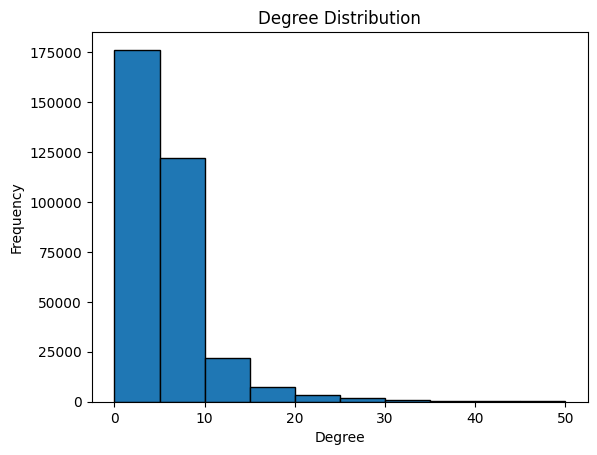

In [ ]:
import matplotlib.pyplot as plt

# c) Degree distribution
degrees = [deg for _, deg in G.degree()]
avg_degree = sum(degrees) / len(degrees)
print(f"Average degree: {avg_degree}")

plt.hist(degrees, edgecolor='black', range=(0, 50) )
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

### As we can see in this histogram, more than 60000 nodes have 5 edges!

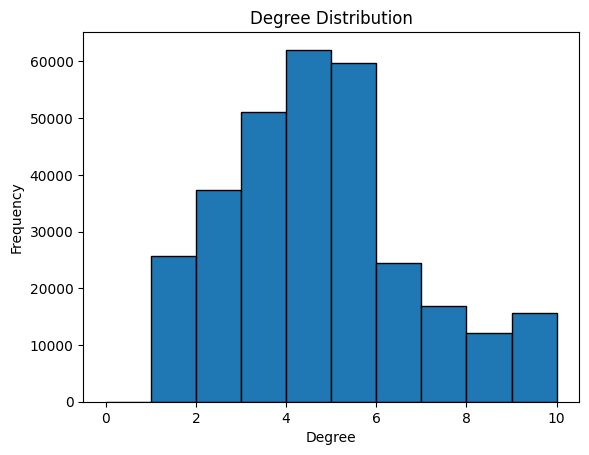

In [ ]:
plt.hist(degrees, edgecolor='black', range=(0, 10) )
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

### d) In this part, I sampled the first 20000 edges of our dataset which consists 22283 nodes.It results that my sample's ASP is 1.68
###   I checked many samples sampled by whether edges or nodes, and the results were pretty the same and a number between 1.5 and 2.

### I also downloaded top 5000 communities from their website which had 16000 nodes, and the ASP I got was 3.04. So, I expect that the real number would be around 2.5!

In [ ]:
G_sample = nx.Graph()

for i in data['hi'][:20000]:
    if len(i.split()) == 2:
      j,k = i.split()
      G_sample.add_edge(j,k)
    else:
      G_sample.add_node(i)

num_nodes = G_sample.number_of_nodes()
num_edges = G_sample.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

#d) Average path length
total = 0
num_com = 0
components = (G_sample.subgraph(c).copy() for c in nx.connected_components(G_sample))
for i, component in enumerate(components, start=1):
    num_com += 1
    avg_path_length = nx.average_shortest_path_length(component)
    total += avg_path_length

print(f"Number of connected components: {num_com}")
print(f'Sampled average shortest path:',total/num_com)

Number of nodes: 22283
Number of edges: 20000
Number of connected components: 2840
Sampled average shortest path: 1.687590661211284


### e) In this part, Average clustering coefficient is calculated. It's the same as they reported in their website which is 0.3967!

In [ ]:
# e) Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average clustering coefficient: {avg_clustering}")

Average clustering coefficient: 0.3967463932787655


### And finally, I visualized a random 1000 nodes in our graph!

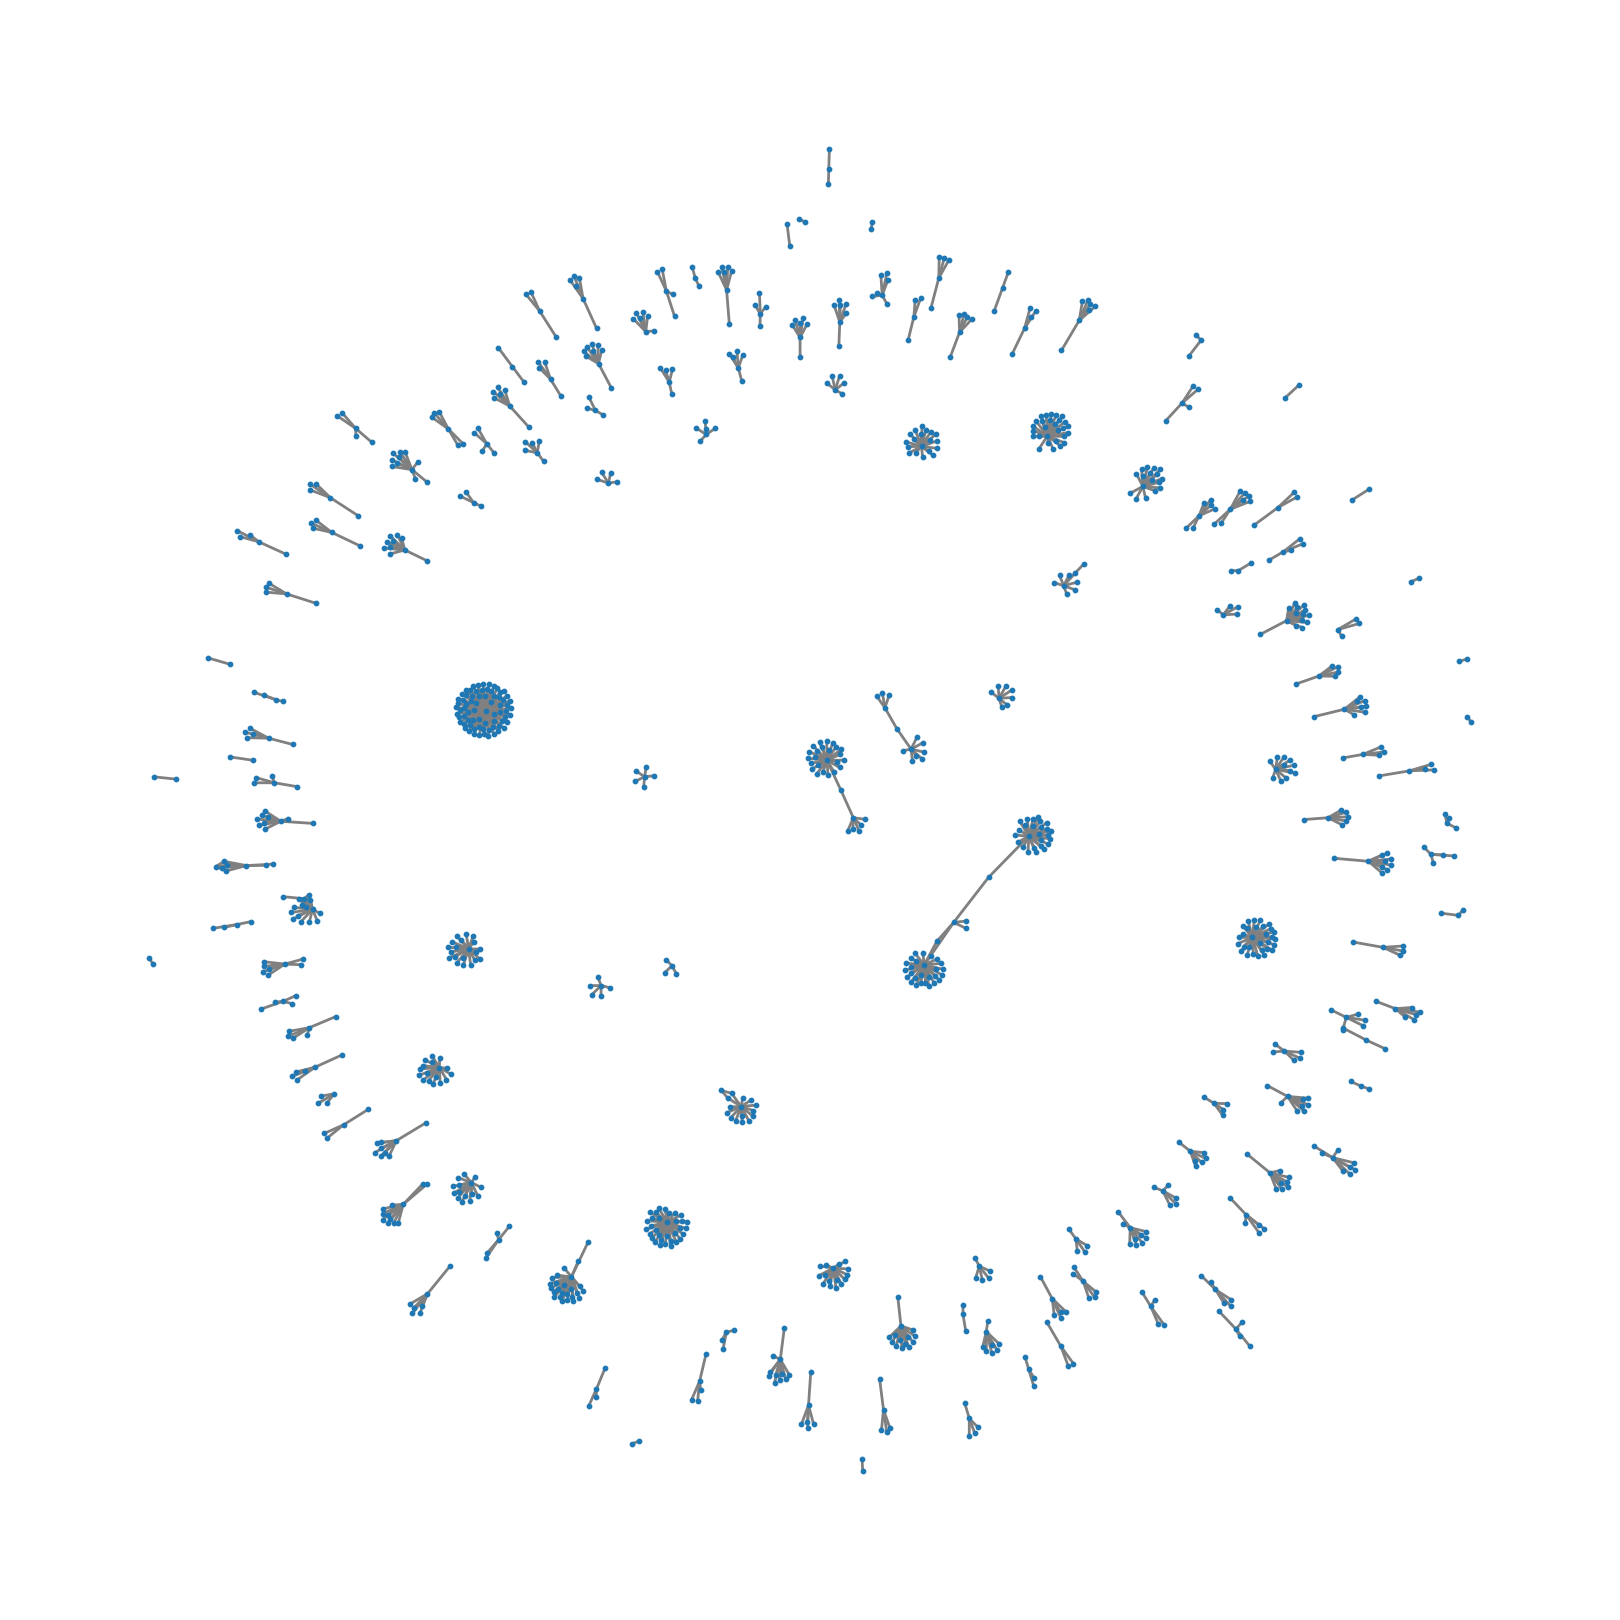

In [ ]:
plt.figure(figsize=(16, 16))
fig = nx.draw(G_sample, node_size=10, width = 2 ,edge_color='gray')